loading libraries   

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Loading data to dataframe

In [2]:
raw_mail_data= pd.read_csv('spam.csv')
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [40]:
raw_mail_data.shape

(5572, 5)

In [43]:
raw_mail_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [44]:
raw_mail_data.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [45]:
raw_mail_data.diff

<bound method DataFrame.diff of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [46]:
raw_mail_data.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [47]:
mail_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",,,
1,1,Ok lar... Joking wif u oni...,,,
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,1,U dun say so early hor... U c already then say...,,,
4,1,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,,,
5568,1,Will �_ b going to esplanade fr home?,,,
5569,1,"Pity, * was in mood for that. So...any other s...",,,
5570,1,The guy did some bitching but I acted like i'd...,,,


Assigning 0 and 1 to Spam and Ham

In [3]:
mail_data.loc[mail_data['v1']== 'spam','v1']= 0
mail_data.loc[mail_data['v1']==  'ham','v1'] = 1

In [4]:
x = mail_data['v2']
y = mail_data['v1']

In [48]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [49]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

Data Visualization

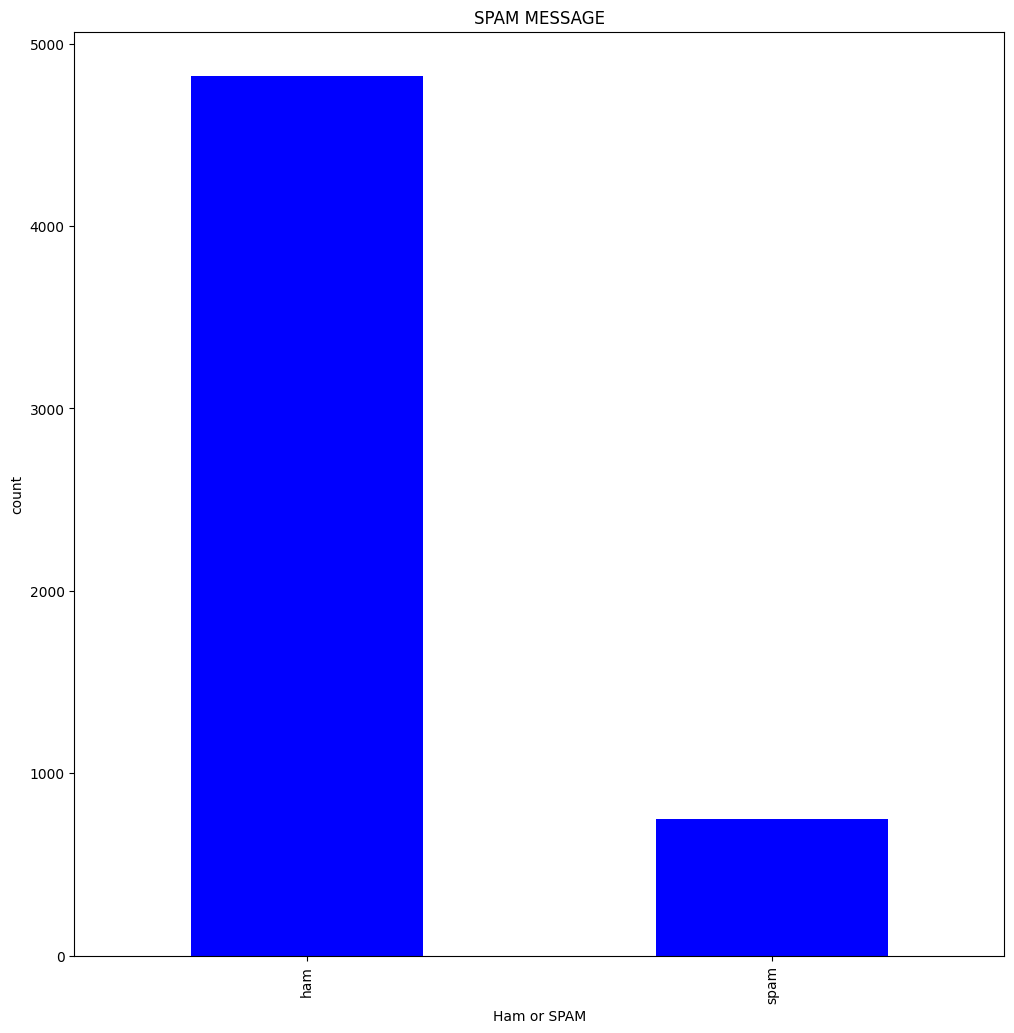

In [36]:
plt.figure(figsize = (12,12))
bank = raw_mail_data["v1"].value_counts()
bank.plot(kind="bar" ,color = 'BLUE')
plt.xlabel('Ham or SPAM')
plt.ylabel('count')
plt.title('SPAM MESSAGE')
plt.show()

Data Distribution to train and test

In [5]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2 , random_state=3)

Vectorizing string data to Numbers

In [50]:
feature_extr= TfidfVectorizer(min_df=1 , stop_words='english')
x_train_feature = feature_extr.fit_transform(x_train)
x_test_feature = feature_extr.transform(x_test) 

TfidfVectorizer(stop_words='english')

In [51]:
x_train_feature

<4457x7468 sparse matrix of type '<class 'numpy.float64'>'
	with 34599 stored elements in Compressed Sparse Row format>

In [7]:
y_train= y_train.astype('int')
y_test= y_test.astype('int')

In [52]:
y_train

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: v1, Length: 4457, dtype: int32

In [53]:
y_test

2632    1
454     0
983     1
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    0
Name: v1, Length: 1115, dtype: int32

Applying ML model

In [26]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier()
model= model.fit(x_train_feature, y_train)

prediction on training dataset

In [27]:
prediction_on_training =  model.predict(x_train_feature)
accuracy_score_checking_training= accuracy_score(y_train, prediction_on_training)

prediction on testing dataset

In [28]:
prediction_on_testing =  model.predict(x_test_feature)
accuracy_score_checking_test= accuracy_score(y_test, prediction_on_testing)

New Prediction

In [29]:
content = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv"
input_mail=[content]
input_data_extraction= feature_extr.transform(input_mail)
prediction= model.predict(input_data_extraction)

In [30]:
if prediction[0]==1:
    print('message is HAM')
else: print('message is SPAM')

message is SPAM


In [31]:
print('TRAINING', accuracy_score_checking_training)
print('TESTING', accuracy_score_checking_test)

TRAINING 1.0
TESTING 0.979372197309417
